In [1]:
import pandas as pd
import scipy.io as spio
url = "E:\\Algo-Learning\\PCA\\PCA_NumberImages\\ex3data1.mat"
matdata = spio.loadmat(url)


In [24]:
print(matdata)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}


In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(matdata['X'])

In [27]:
y=matdata
y=pd.DataFrame(y)

Exception: Data must be 1-dimensional

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, matdata['y'], axis = 1)

    
                           

SyntaxError: invalid syntax (<ipython-input-26-a622baec702e>, line 5)

In [21]:
print(finalDf)

      principal component 1  principal component 2   0
0                  6.304278              -5.621443  10
1                  7.524463              -5.980349  10
2                  1.029748              -4.832756  10
3                  4.010460              -5.729508  10
4                 12.256923              -3.127079  10
5                 12.389940               4.496626  10
6                  9.342860              -5.822592  10
7                  9.012091               6.397640  10
8                  5.069741              -0.400742  10
9                  3.541020              -3.981352  10
10                 3.835910              -5.161982  10
11                10.326678               3.209236  10
12                 4.871619              -4.255702  10
13                11.150056               7.409860  10
14                15.395617               0.090820  10
15                 4.646606              -1.986744  10
16                10.890518              -9.149452  10
17        

KeyError: '0'

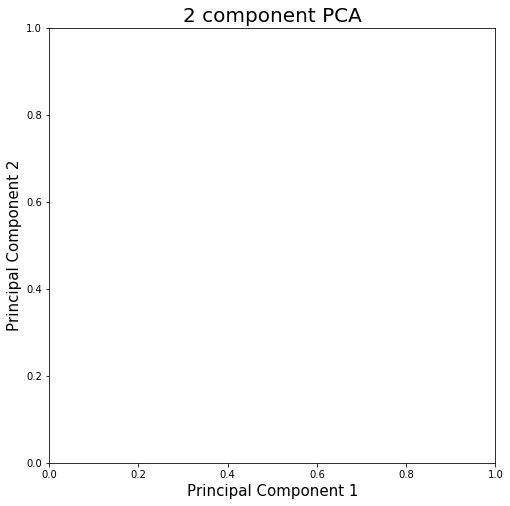

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['10', '9']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['0'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()